In [1]:
%load_ext autoreload
%autoreload 2

# Setup Environment
import sys
import os
ROOT = '../../'
sys.path.append(ROOT)

import gym
from gym.spaces import Discrete
import numpy as np
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from IPython.display import HTML
from source.agents.dqn_agent import DQNAgent
from source import utils
from tqdm import tqdm
import torch
import random

/Users/tonywy/micromamba/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


using device: cpu


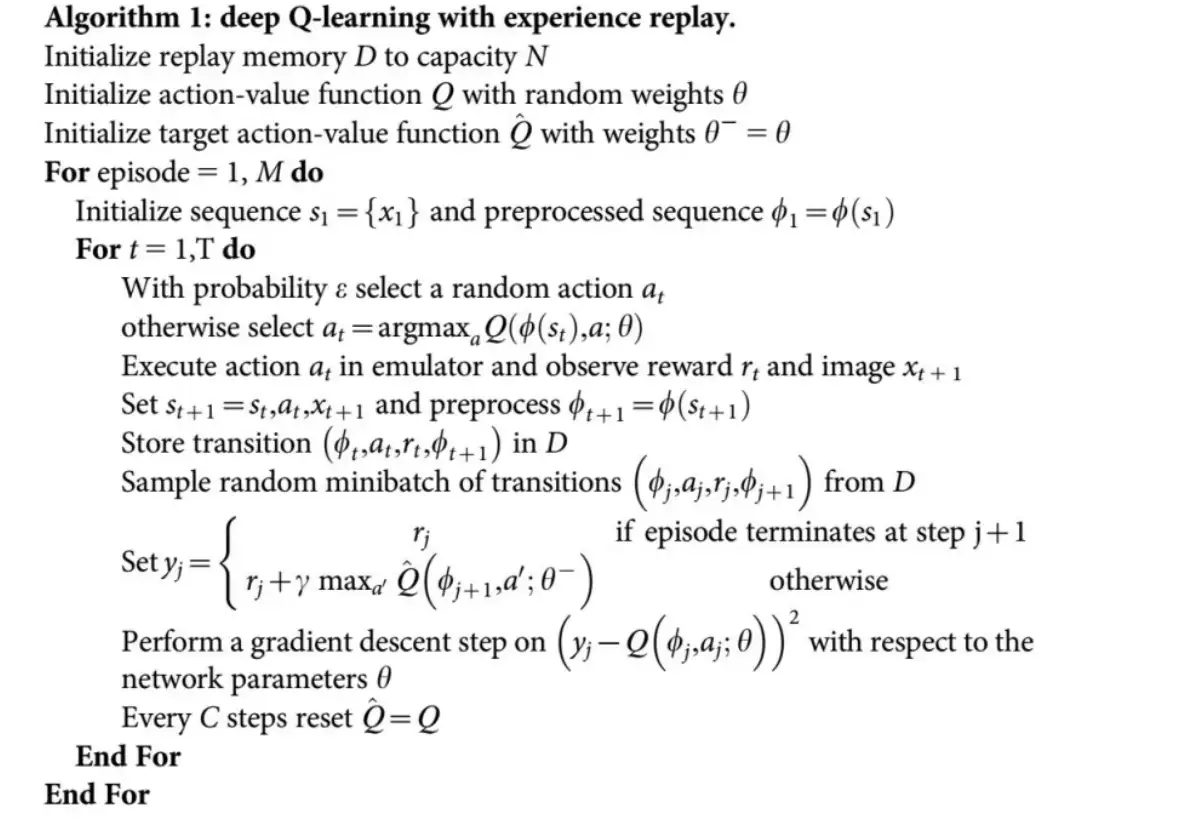

using device: cpu


100%|██████████| 100/100 [00:15<00:00,  6.28it/s]


step: 0, epsilon: 0.9, average_return: -109.52350204882423, success rate: 0.0


100%|██████████| 100/100 [00:16<00:00,  5.97it/s]


step: 1, epsilon: 0.652301697309926, average_return: -84.74582066742921, success rate: 0.04


100%|██████████| 100/100 [00:36<00:00,  2.76it/s]


step: 2, epsilon: 0.4727750047926781, average_return: -61.4926054774396, success rate: 0.46


100%|██████████| 100/100 [00:59<00:00,  1.69it/s]


step: 3, epsilon: 0.34265770896885817, average_return: -41.43326539908681, success rate: 0.65


100%|██████████| 100/100 [01:38<00:00,  1.02it/s]


step: 4, epsilon: 0.24835133906301868, average_return: -19.59504495902927, success rate: 0.81


100%|██████████| 100/100 [01:16<00:00,  1.31it/s]


step: 5, epsilon: 0.18, average_return: -5.7204682194352605, success rate: 0.84


100%|██████████| 100/100 [01:05<00:00,  1.53it/s]


step: 6, epsilon: 0.1304603394619852, average_return: 16.364562513595146, success rate: 0.95


100%|██████████| 100/100 [00:55<00:00,  1.81it/s]


step: 7, epsilon: 0.09455500095853563, average_return: 37.05869824027597, success rate: 0.94


100%|██████████| 100/100 [00:45<00:00,  2.18it/s]


step: 8, epsilon: 0.06853154179377163, average_return: 52.02926779410624, success rate: 0.94


100%|██████████| 100/100 [00:44<00:00,  2.27it/s]


step: 9, epsilon: 0.05, average_return: 63.605429533100875, success rate: 0.96

rewarding episodes: 63605.4295331009


100%|██████████| 100/100 [00:07<00:00, 13.85it/s]


Average return = 250.95510154703362, Success rate = 1.0


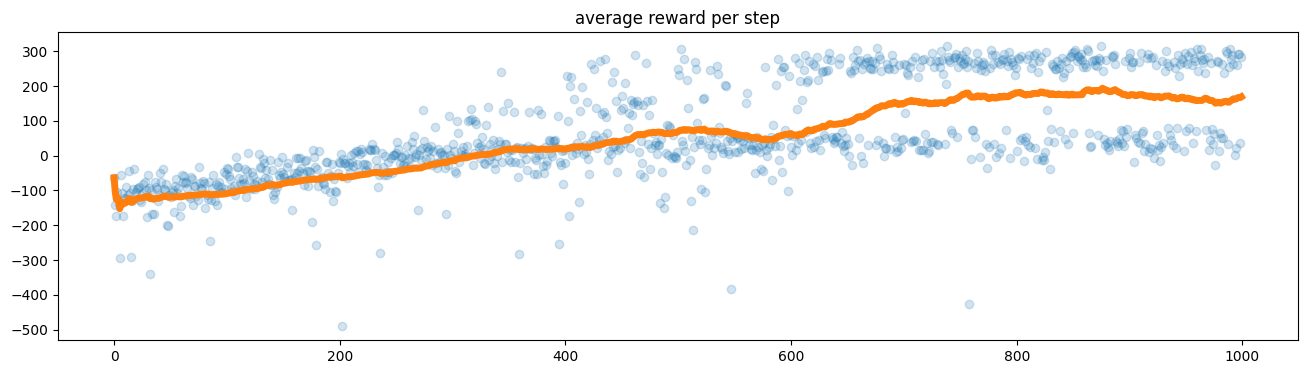

In [2]:
# Policy Eval
# Params
num_epoch = 10
num_episode = 100
video_path = os.path.join(ROOT, "video/dqn_lunar.mp4")
random_seed = 101

# Initialize
history = []
total_reward = 0
# set random seeds
rng = np.random.default_rng(random_seed)
#random.seed(random_seed)
np.random.seed(random_seed)
#torch.manual_seed(random_seed)
# epsilon decay
epsilon_schedule = utils.create_decay_schedule(num_epoch)
lr_schedule = utils.create_decay_schedule(num_epoch)

# Create Environment.
#env = gym.make('Taxi-v3')
# using render_mode=rgb_array so that video recording works
env = gym.make(
    "LunarLander-v2",
    render_mode='rgb_array'
)
#env = gym.make("CarRacing-v2", render_mode='rgb_array', continuous=False)

env.np_random = rng

# Create Agent
agent = DQNAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    discount_rate=0.99,
    epsilon=None, # use epsilon_schedule
    learning_rate=1e-3,
    batch_size = 128,
    tau = 0.005,
)
# Start Learning
for i in range(num_epoch):
    hisotry = []
    success = 0
    for _ in tqdm(range(num_episode)):
        reward, steps = agent.play_episode(env,epsilon=epsilon_schedule[i])
        if reward > 0:
            success += 1
        history.append(reward)
        total_reward += reward
    #score = agent.update()
    print(
        f"step: {i}, epsilon: {agent._epsilon}, average_return: {np.mean(history)}, success rate: {success / num_episode}")
print(f"\nrewarding episodes: {total_reward}")

# For off policy learning only: get greedy policy (no exploration)
#agent._policy = get_epsilon_greedy_policy_from_action_values(agent._Q.weight)
# Run Eval
avarge_return, success_rate = utils.evaluate_agent(agent, env, 100)
print(f"Average return = {avarge_return}, Success rate = {success_rate}")

# play last episode with video recording

utils.plot_history(history)


In [3]:

reward, _ = agent.play_episode(env, learning=False, video_path=video_path, epsilon=0)
print(video_path)
print(reward)
html=utils.render_mp4(video_path)
HTML(html)


using device: cpu
Moviepy - Building video ../../video/dqn_lunar.mp4.
Moviepy - Writing video ../../video/dqn_lunar.mp4



Moviepy - Done !
Moviepy - video ready ../../video/dqn_lunar.mp4
../../video/dqn_lunar.mp4
47.889162289070526
